In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Housing = pd.read_csv("D:\Term 2\Machine Learning\Working Directory\HousingFinance1.csv")

In [3]:
Housing

,ID,Decision,Build_Selfcon,Tier,Marital_Status,Employer_Type,OldEmi_d,BankSave_d,Age,YrsAdd,...,TotInc,MarVal,LoanReq,Term,CalcEmi,IIR,IAR,OldEmi,LTV,FOIR
0,AJM-39R8-519413,0,Self Contruction,3,Married,Business,1,0,31,25,...,51090,500000,200000,84,4087.159912,7.999922,11.000000,7306,40.000000,22.300176
1,AJM-3A3Z-876970,0,Self Contruction,3,Married,Ind/SmallBus,1,0,41,2,...,22386,450704,320000,180,4924.810059,21.999509,38.999129,2431,71.000035,32.858975
2,AJM-7427-952085,1,Self Contruction,3,Married,Ind/SmallBus,0,0,51,9,...,32536,2777778,500000,84,11712.969730,36.000030,56.000047,0,17.999999,36.000030
3,AJM-8ZTZ-979040,1,Self Contruction,3,Married,Business,0,0,26,2,...,41595,1785714,1000000,180,15390.040040,36.999736,52.999656,0,56.000009,36.999736
4,AJM-9SP2-614810,1,Self Contruction,3,Married,Business,0,0,31,30,...,37537,1960784,1000000,180,15390.040040,40.999654,57.000148,0,51.000008,40.999654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,VAD-Y9R6-941258,1,Self Contruction,2,Married,Business,1,0,39,30,...,20520,701754,400000,180,6156.020020,30.000098,52.002196,2040,57.000031,39.941618
1566,VAD-29WV-651610,1,Self Contruction,2,Married,Ind/SmallBus,0,0,35,20,...,21962,789474,300000,84,7027.779785,31.999726,60.999738,0,37.999985,31.999726
1567,VAD-R68F-640160,1,Self Contruction,2,Married,Ind/SmallBus,0,0,29,28,...,23580,652174,150000,84,3065.370117,12.999873,24.000706,0,22.999997,12.999873
1568,VAD-BDY4-508178,1,Self Contruction,2,Married,Ind/SmallBus,1,0,49,25,...,81000,2631579,1000000,180,15390.040040,19.000049,40.999654,22656,37.999999,46.970420


In [4]:
Housing.describe()

,Decision,Tier,OldEmi_d,BankSave_d,Age,YrsAdd,YrsJob,TotInc,MarVal,LoanReq,Term,CalcEmi,IIR,IAR,OldEmi,LTV,FOIR
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,0.799363,1.996815,0.129936,0.119745,37.755414,9.840764,10.929299,29773.247134,1.177865e+06,593114.883439,160.135669,9614.650270,35.491610,64.426409,770.103185,56.553662,37.364287
std,0.400605,0.792325,0.336340,0.324767,8.410670,10.481894,7.986092,18064.471699,6.553948e+05,237395.064240,36.976144,3633.136794,10.550461,21.454229,3101.888861,22.090929,10.651161
min,0.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7000.000000,5.996000e+04,76000.000000,15.000000,960.130005,4.000042,4.999896,0.000000,4.000000,4.000042
25%,1.000000,1.000000,0.000000,0.000000,31.000000,2.000000,4.000000,18773.250000,7.897618e+05,400000.000000,168.000000,6790.857544,28.000223,48.989497,0.000000,42.000008,30.000096
50%,1.000000,2.000000,0.000000,0.000000,37.000000,5.000000,10.000000,25127.000000,1.072752e+06,600000.000000,180.000000,9234.030273,36.000089,66.998592,0.000000,56.999999,38.000842
75%,1.000000,3.000000,0.000000,0.000000,43.000000,15.000000,15.000000,35237.500000,1.403509e+06,800000.000000,180.000000,12312.030270,43.999994,81.999840,0.000000,71.000027,46.000369
max,1.000000,3.000000,1.000000,1.000000,63.000000,61.000000,60.000000,219858.000000,7.272727e+06,1000000.000000,180.000000,19882.060550,65.000634,99.999126,40000.000000,222.222222,73.250858


# binary variable

In [5]:
Housing['Marital_Status'].replace({'Married':1,'Unmarried':0},inplace=True)

In [6]:
Housing['Build_Selfcon'].replace({'Self Contruction':1,'Builder':0},inplace=True)

# Dummy

In [7]:
Dummy = pd.get_dummies(Housing['Employer_Type'])
Dummy1 = pd.get_dummies(Housing['Tier'])
Housing = pd.concat([Housing,Dummy,Dummy1],axis=1)

In [8]:
Housing.head()

,ID,Decision,Build_Selfcon,Tier,Marital_Status,Employer_Type,OldEmi_d,BankSave_d,Age,YrsAdd,...,OldEmi,LTV,FOIR,Business,Corporate,Govt,Ind/SmallBus,1,2,3
0,AJM-39R8-519413,0,1,3,1,Business,1,0,31,25,...,7306,40.000000,22.300176,1,0,0,0,0,0,1
1,AJM-3A3Z-876970,0,1,3,1,Ind/SmallBus,1,0,41,2,...,2431,71.000035,32.858975,0,0,0,1,0,0,1
2,AJM-7427-952085,1,1,3,1,Ind/SmallBus,0,0,51,9,...,0,17.999999,36.000030,0,0,0,1,0,0,1
3,AJM-8ZTZ-979040,1,1,3,1,Business,0,0,26,2,...,0,56.000009,36.999736,1,0,0,0,0,0,1
4,AJM-9SP2-614810,1,1,3,1,Business,0,0,31,30,...,0,51.000008,40.999654,1,0,0,0,0,0,1


In [9]:
Housing["Employer_Type"].unique()

array(['Business', 'Ind/SmallBus', 'Govt', 'Corporate'], dtype=object)

# Correlation

In [10]:
corrmat = Housing.corr()

C:\Users\aryan\AppData\Local\Temp\ipykernel_9868\3003940178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = Housing.corr()


In [11]:
corrmat

,Decision,Build_Selfcon,Tier,Marital_Status,OldEmi_d,BankSave_d,Age,YrsAdd,YrsJob,TotInc,...,OldEmi,LTV,FOIR,Business,Corporate,Govt,Ind/SmallBus,1,2,3
Decision,1.000000,-0.015368,-0.068278,0.016587,0.070622,0.081907,-0.034625,-0.090183,-0.078546,-0.078979,...,0.016299,-0.256305,0.035585,-0.113549,0.032766,0.015585,0.095244,-0.005767,0.122936,-0.122499
Build_Selfcon,-0.015368,1.000000,0.193712,0.013656,-0.003325,-0.195332,-0.016105,-0.032089,0.042718,0.125680,...,0.026702,-0.139853,0.017063,0.020273,-0.027132,0.058873,-0.037642,-0.233536,0.131503,0.096959
Tier,-0.068278,0.193712,1.000000,-0.012140,-0.012796,-0.008424,-0.055110,-0.056774,0.003087,0.134287,...,0.034130,0.004302,-0.043103,0.004093,0.097358,0.015891,-0.105590,-0.853981,0.003099,0.853105
Marital_Status,0.016587,0.013656,-0.012140,1.000000,-0.006304,0.002907,0.313611,0.006433,0.176796,0.003882,...,0.024442,-0.040869,-0.050818,0.078703,-0.042284,0.035649,-0.078282,0.007163,0.006122,-0.013571
OldEmi_d,0.070622,-0.003325,-0.012796,-0.006304,1.000000,0.003337,0.029716,0.046187,0.054675,0.178236,...,0.642645,-0.000423,0.227567,0.084050,-0.046689,-0.032065,-0.036253,-0.025761,0.070474,-0.047706
BankSave_d,0.081907,-0.195332,-0.008424,0.002907,0.003337,1.000000,0.043162,0.028072,-0.001403,-0.013257,...,-0.018119,0.013264,-0.011985,-0.006579,0.098175,-0.016686,-0.072249,0.117071,-0.211203,0.102993
Age,-0.034625,-0.016105,-0.055110,0.313611,0.029716,0.043162,1.000000,0.191920,0.450936,-0.027841,...,0.025561,-0.076891,-0.002236,-0.035091,-0.053034,0.197468,-0.038143,0.062457,-0.029756,-0.031579
YrsAdd,-0.090183,-0.032089,-0.056774,0.006433,0.046187,0.028072,0.191920,1.000000,0.217080,-0.001213,...,0.006167,-0.002519,-0.007058,0.031641,-0.018819,0.082052,-0.074129,0.071276,-0.043983,-0.025578
YrsJob,-0.078546,0.042718,0.003087,0.176796,0.054675,-0.001403,0.450936,0.217080,1.000000,0.094424,...,0.028538,-0.022081,-0.077001,0.340163,-0.289768,0.226842,-0.286746,0.027301,-0.057529,0.032654
TotInc,-0.078979,0.125680,0.134287,0.003882,0.178236,-0.013257,-0.027841,-0.001213,0.094424,1.000000,...,0.313574,0.072857,-0.384745,0.279501,-0.059749,-0.087277,-0.221801,-0.098021,-0.031598,0.131264


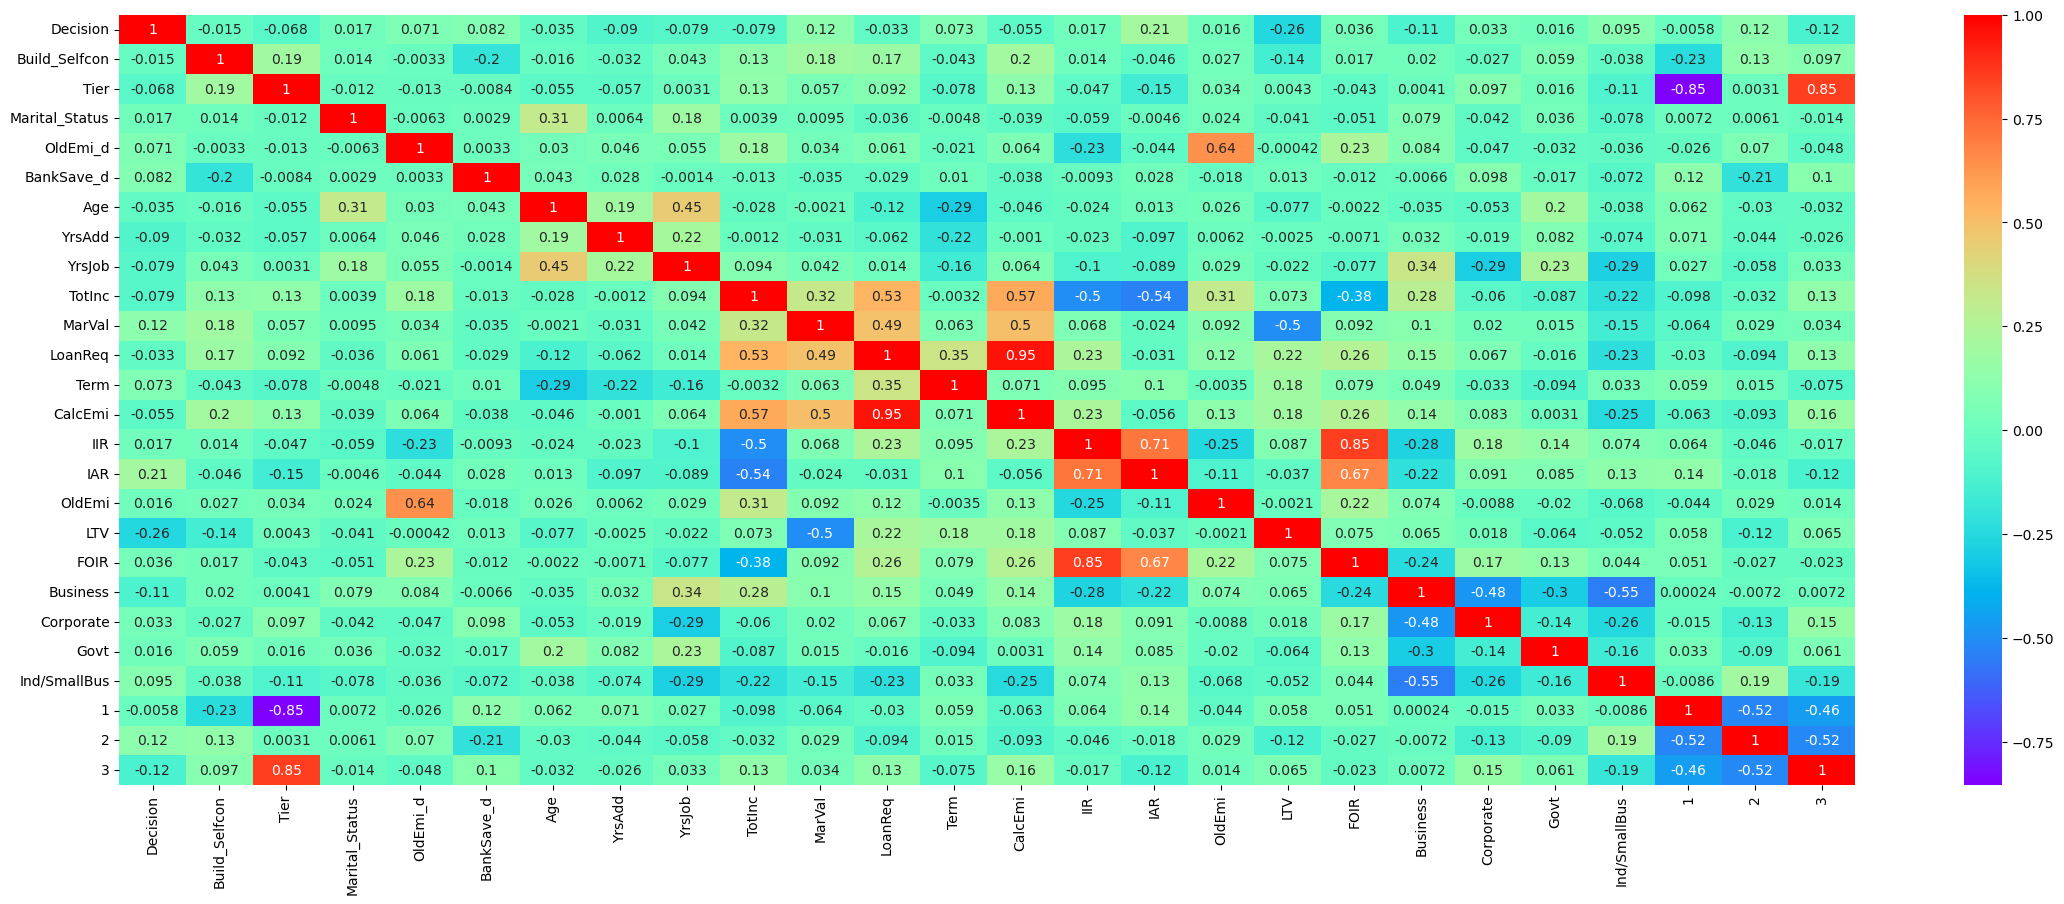

In [12]:
plt.figure(figsize=(28,10))
sns.heatmap(corrmat,annot=True,cmap="rainbow")
plt.show()

# Train and Test

In [13]:
list(Housing.columns)

['ID',
 'Decision',
 'Build_Selfcon',
 'Tier',
 'Marital_Status',
 'Employer_Type',
 'OldEmi_d',
 'BankSave_d',
 'Age',
 'YrsAdd',
 'YrsJob',
 'TotInc',
 'MarVal',
 'LoanReq',
 'Term',
 'CalcEmi',
 'IIR',
 'IAR',
 'OldEmi',
 'LTV',
 'FOIR',
 'Business',
 'Corporate',
 'Govt',
 'Ind/SmallBus',
 1,
 2,
 3]

In [14]:
Col = ['Build_Selfcon','Marital_Status','OldEmi_d','BankSave_d',
       'Age','YrsAdd','YrsJob','TotInc','MarVal','LoanReq','Term','CalcEmi','IIR','IAR','OldEmi',
 'LTV','FOIR','Business','Corporate','Govt','Ind/SmallBus']

x = Housing[Col] #all independent varible
y = Housing.Decision #dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Decision Tree

In [15]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [16]:
model = clf.fit(x_train,y_train)

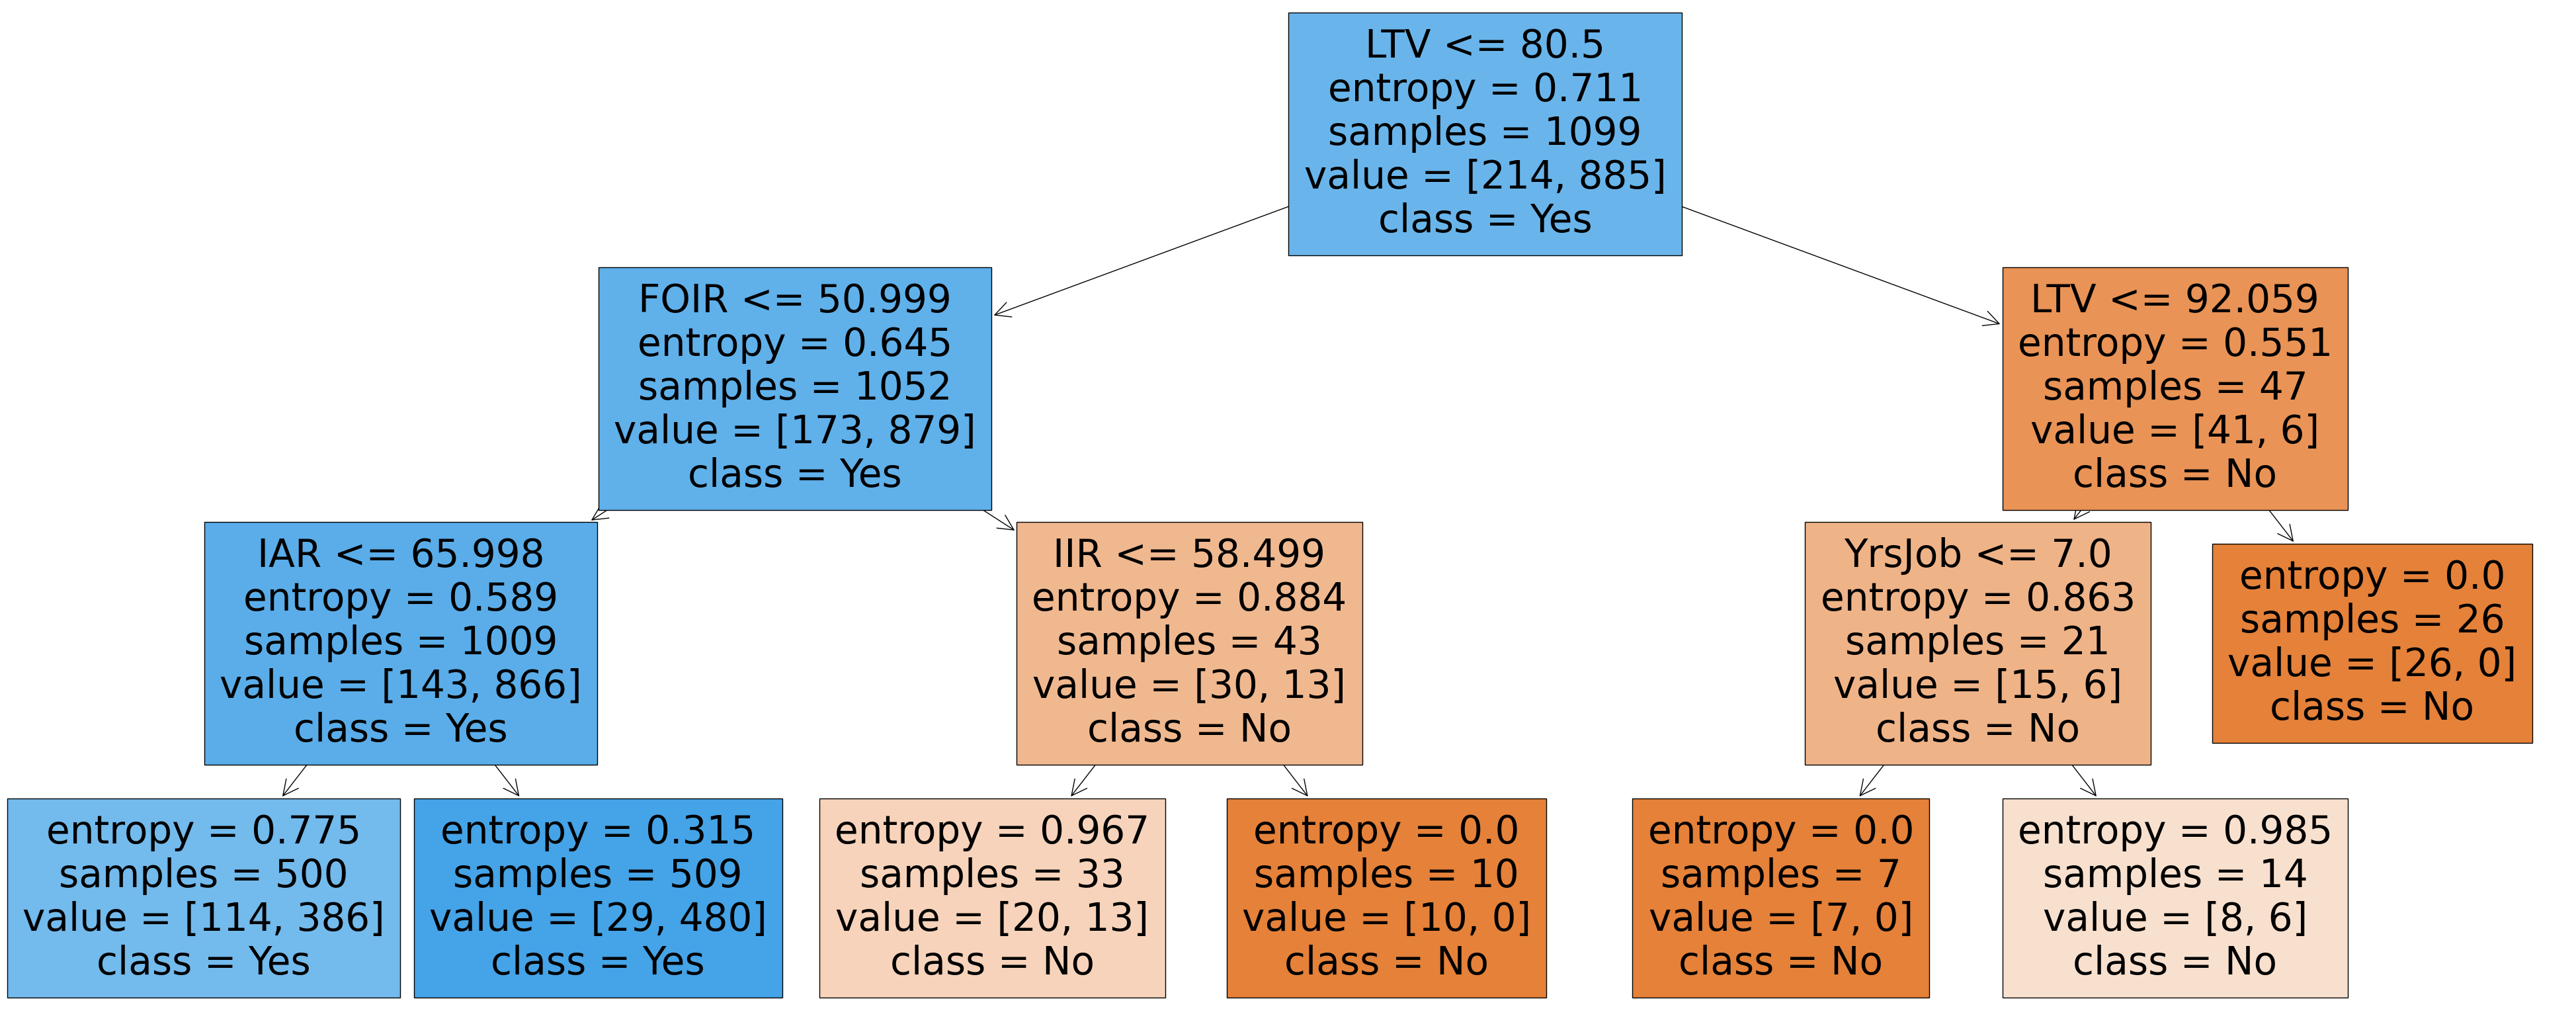

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_=tree.plot_tree(clf,feature_names=Col,class_names=['No','Yes'],filled=True) #No is 0 and Yes is 1, _ means do not care
fig.savefig("dt.png")

In [18]:
y_pred = model.predict(x_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8152866242038217


# Confusion Matrix

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

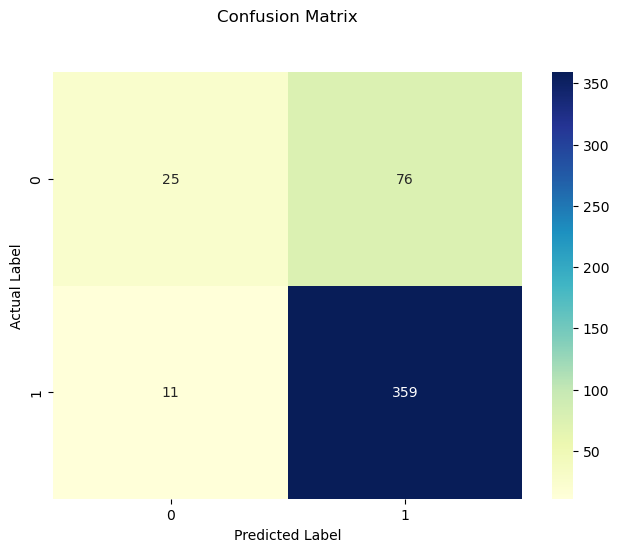

In [21]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Hyper Parameter Tunning

In [22]:
parameters = {"criterion":["entropy","gini"],"max_depth": list(range(1,10))}

In [23]:
clf = DecisionTreeClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=parameters,cv=10)

In [25]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [26]:
grid.best_estimator_ #pass the best estimator back to the model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [27]:
grid.best_score_ #accuracy at the best estimator

0.8453628023352794

In [28]:
Housing['Decision'].value_counts()

1    1255
0     315
Name: Decision, dtype: int64

### Class imbalance

In [29]:
pip install scikit-learn==1.2.2

In [30]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state=30)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [36]:
print(np.bincount(y_train))

[214 885]


In [37]:
print(np.bincount(y_res))

[885 885]


In [38]:
model1=clf.fit(x_res,y_res)

In [39]:
y_pred1 = model1.predict(x_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred1))

Accuracy: 0.7048832271762208


Text(0.5, 23.52222222222222, 'Predicted Label')

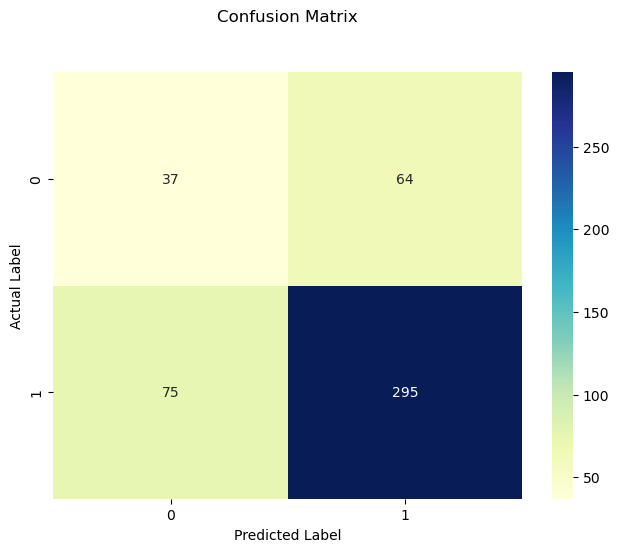

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')